# Task 3: Working with Tensors in NumPy

In this notebook, we'll work with multi-dimensional temperature data across cities, days, and hours using NumPy tensors. We'll cover:

1. Creating a temperature tensor
2. Indexing and slicing operations
3. Statistical operations on tensor data
4. Tensor transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

## 1. Creating a Temperature Tensor

We'll create a tensor T with the shape (7, 24, 3):
- 7 days of the week
- 24 hours per day
- 3 cities

We'll fill it with random temperatures from -10 to +35 degrees.

In [2]:
DAYS = 7
HOURS = 24
CITIES = 3
city_names = ["New York", "Tokyo", "Paris"]
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
T = np.random.uniform(-10, 35, size=(DAYS, HOURS, CITIES))
T = np.round(T, 1)
print(f"Created tensor with shape: {T.shape}")
print(f"Memory usage: {T.nbytes / 1024:.2f} KB")
print("\nSample temperature data (Monday, first 5 hours):")
for hour in range(5):
    print(f"Hour {hour}:00 - {city_names[0]}: {T[0, hour, 0]}°C, {city_names[1]}: {T[0, hour, 1]}°C, {city_names[2]}: {T[0, hour, 2]}°C")

Created tensor with shape: (7, 24, 3)
Memory usage: 3.94 KB

Sample temperature data (Monday, first 5 hours):
Hour 0:00 - New York: 6.9°C, Tokyo: 32.8°C, Paris: 22.9°C
Hour 1:00 - New York: 16.9°C, Tokyo: -3.0°C, Paris: -3.0°C
Hour 2:00 - New York: -7.4°C, Tokyo: 29.0°C, Paris: 17.1°C
Hour 3:00 - New York: 21.9°C, Tokyo: -9.1°C, Paris: 33.6°C
Hour 4:00 - New York: 27.5°C, Tokyo: -0.4°C, Paris: -1.8°C


## 2. Indexing and Slicing

Now let's use various indexing and slicing operations to extract specific subsets of the data:
1. Temperatures in the 2nd city for all days and hours
2. Temperatures on the 1st day for all cities
3. Temperature on the 3rd day, at 12:00, in the 2nd city

Shape of Tokyo temperature data: (7, 24)
Sample of Tokyo temperatures (first 3 days, first 3 hours):
[[32.8 -3.  29. ]
 [26.7 24.7 -4.8]
 [-8.3 -7.7  0.8]]

Shape of Monday temperature data: (24, 3)
Sample of Monday temperatures (first 3 hours, all cities):
[[ 6.9 32.8 22.9]
 [16.9 -3.  -3. ]
 [-7.4 29.  17.1]]

Temperature on Wednesday at 12:00 in Tokyo: -4.9°C


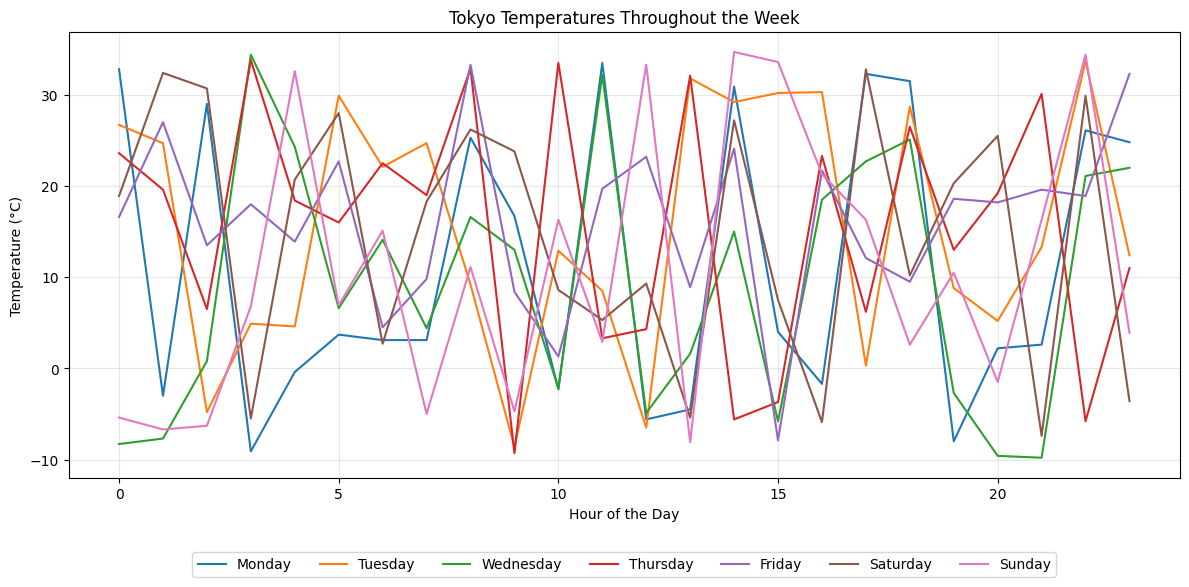

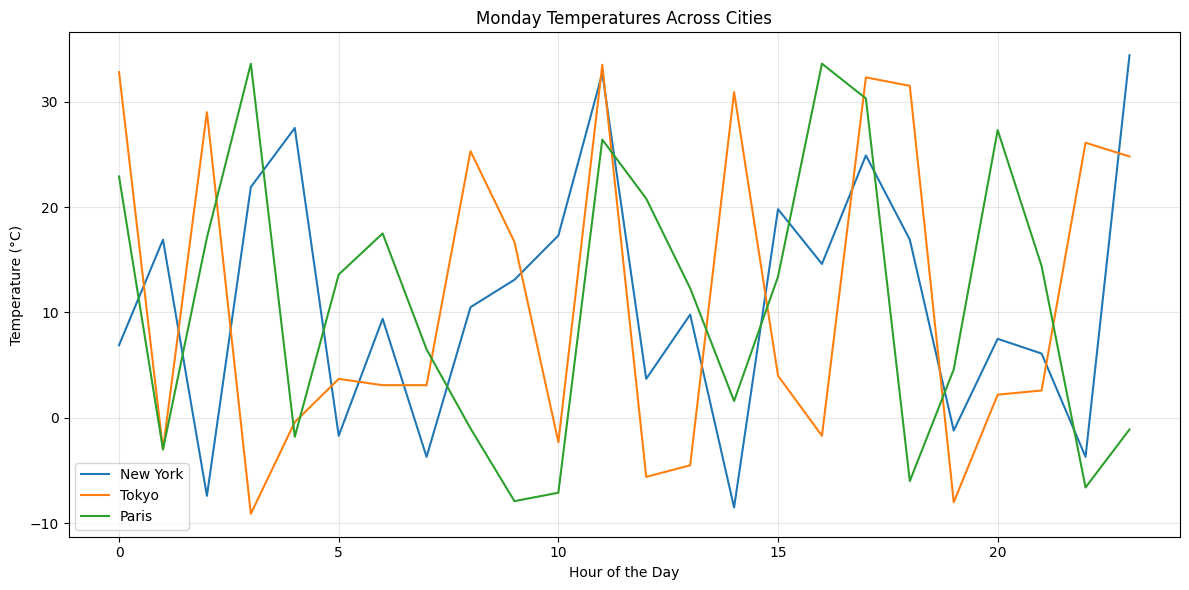

In [3]:
tokyo_temps = T[:, :, 1]
print(f"Shape of Tokyo temperature data: {tokyo_temps.shape}")
print("Sample of Tokyo temperatures (first 3 days, first 3 hours):")
print(tokyo_temps[:3, :3])

monday_temps = T[0, :, :]
print(f"\nShape of Monday temperature data: {monday_temps.shape}")
print("Sample of Monday temperatures (first 3 hours, all cities):")
print(monday_temps[:3])

wednesday_noon_tokyo = T[2, 12, 1]
print(f"\nTemperature on Wednesday at 12:00 in Tokyo: {wednesday_noon_tokyo}°C")
plt.figure(figsize=(12, 6))

for day in range(DAYS):
    plt.plot(tokyo_temps[day], label=day_names[day])
plt.title('Tokyo Temperatures Throughout the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))

for city_idx, city_name in enumerate(city_names):
    plt.plot(monday_temps[:, city_idx], label=city_name)
plt.title('Monday Temperatures Across Cities')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Operations on Tensor Data

Now let's perform some statistical operations:
1. Find the average weekly temperature for each city
2. Find the maximum temperature for each day (across all cities and hours)
3. Find the hour with the lowest average temperature (averaged over all days and cities)

Average weekly temperature for each city:
New York: 12.71°C
Tokyo: 13.28°C
Paris: 11.41°C

Maximum temperature for each day:
Monday: 34.40°C
Tuesday: 33.70°C
Wednesday: 34.40°C
Thursday: 34.60°C
Friday: 33.90°C
Saturday: 34.60°C
Sunday: 34.70°C

The hour with the lowest average temperature is 9:00 with 6.92°C


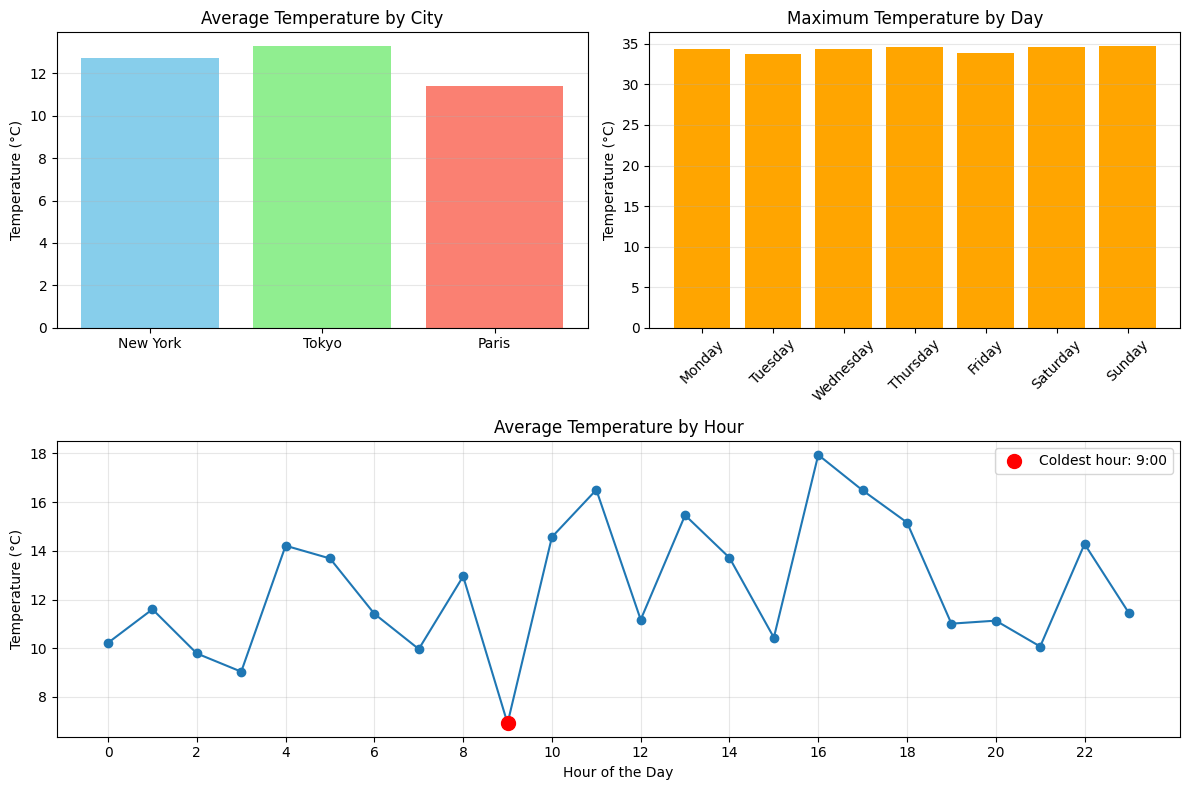

In [4]:
avg_city_temp = np.mean(T, axis=(0, 1))
print("Average weekly temperature for each city:")

for city_idx, city_name in enumerate(city_names):
    print(f"{city_name}: {avg_city_temp[city_idx]:.2f}°C")

max_daily_temp = np.max(T, axis=(1, 2))
print("\nMaximum temperature for each day:")

for day_idx, day_name in enumerate(day_names):
    print(f"{day_name}: {max_daily_temp[day_idx]:.2f}°C")
avg_hourly_temp = np.mean(T, axis=(0, 2))
coldest_hour = np.argmin(avg_hourly_temp)

print(f"\nThe hour with the lowest average temperature is {coldest_hour}:00 with {avg_hourly_temp[coldest_hour]:.2f}°C")
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(city_names, avg_city_temp, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Temperature by City')
plt.ylabel('Temperature (°C)')
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 2, 2)
plt.bar(day_names, max_daily_temp, color='orange')
plt.title('Maximum Temperature by Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(range(24), avg_hourly_temp, marker='o')
plt.scatter(coldest_hour, avg_hourly_temp[coldest_hour], color='red', s=100, zorder=5, label=f'Coldest hour: {coldest_hour}:00')
plt.title('Average Temperature by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 4. Tensor Transformations

Finally, let's perform some transformations:
1. Reshape the tensor into a matrix (7, 72) — each day, all hours and cities in one vector
2. Find the correlation of temperatures between cities (based on averaged daily profiles)

Shape after reshaping: (7, 72)
Sample of reshaped matrix (first 2 days, first 5 columns):
[[ 6.9 32.8 22.9 16.9 -3. ]
 [-9.8 26.7 21.8 22.8 24.7]]

Shape of daily temperature profiles: (24, 3)

Correlation matrix of temperatures between cities:
[[ 1.         -0.0297097   0.25651216]
 [-0.0297097   1.         -0.09046463]
 [ 0.25651216 -0.09046463  1.        ]]


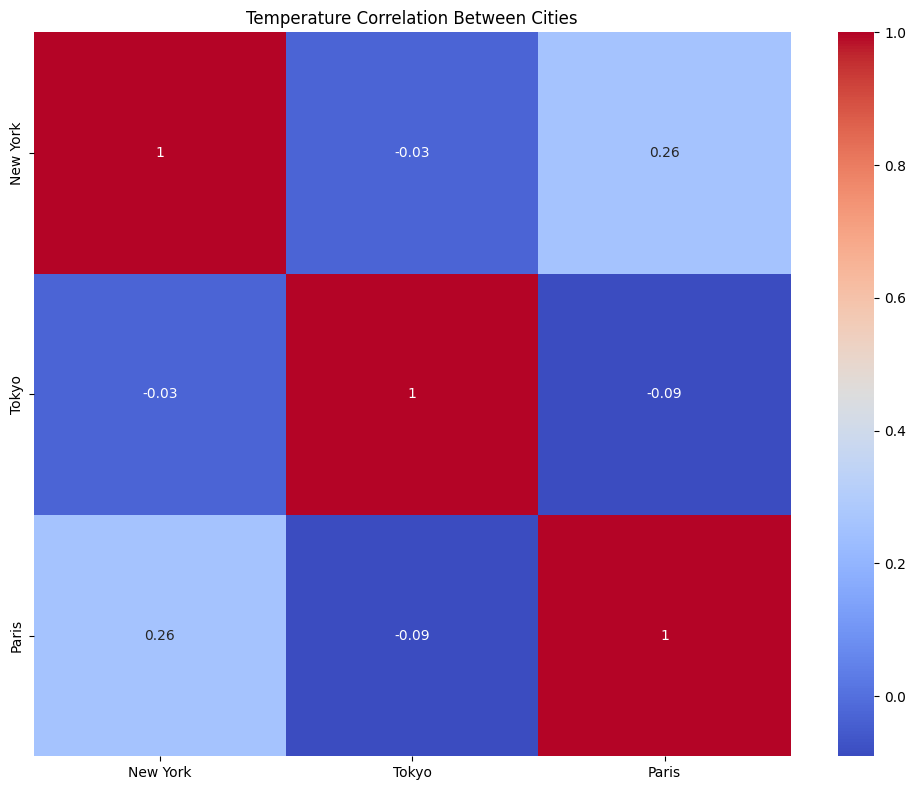

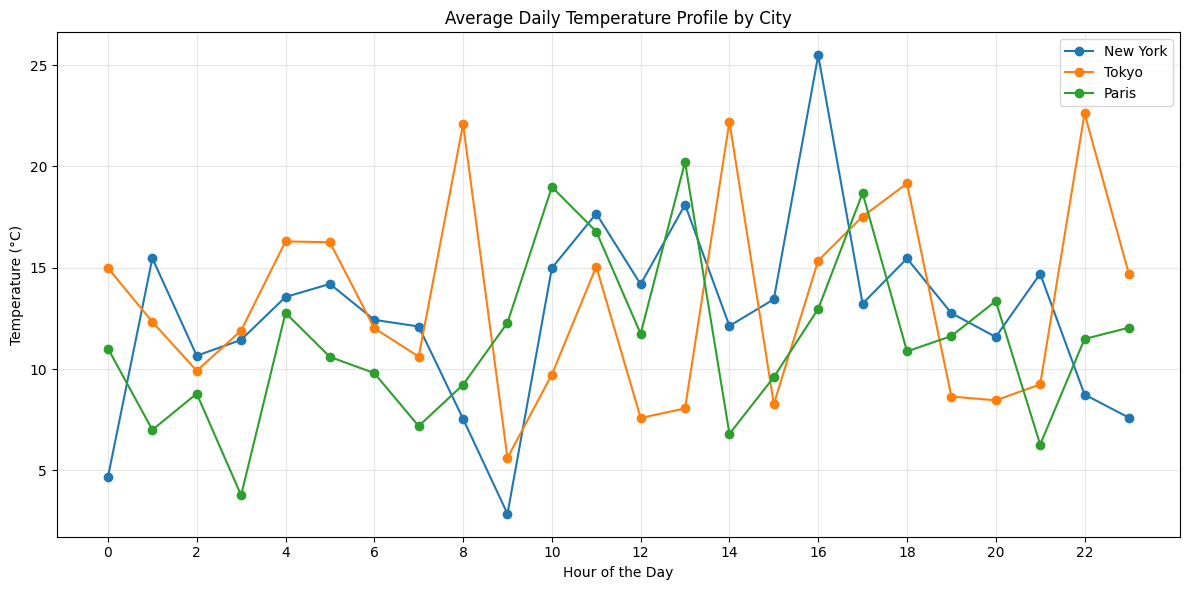

In [6]:
reshaped_T = T.reshape(7, -1)
print(f"Shape after reshaping: {reshaped_T.shape}")
print("Sample of reshaped matrix (first 2 days, first 5 columns):")
print(reshaped_T[:2, :5])

daily_profiles = np.mean(T, axis=0)
print(f"\nShape of daily temperature profiles: {daily_profiles.shape}")

city_correlations = np.corrcoef(daily_profiles, rowvar=False)
print("\nCorrelation matrix of temperatures between cities:")
print(city_correlations)
plt.figure(figsize=(10, 8))
sns.heatmap(city_correlations, annot=True, cmap='coolwarm', xticklabels=city_names, yticklabels=city_names)
plt.title('Temperature Correlation Between Cities')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for city_idx, city_name in enumerate(city_names):
    plt.plot(daily_profiles[:, city_idx], label=city_name, marker='o')
plt.title('Average Daily Temperature Profile by City')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we worked with multi-dimensional temperature data using NumPy tensors. We:

1. **Created a 3D tensor** with shape (7, 24, 3) representing temperatures for 7 days, 24 hours, and 3 cities
2. **Used indexing and slicing** to extract specific subsets of data, such as temperatures for a specific city or day
3. **Performed statistical operations** like finding average temperatures and identifying the coldest hour
4. **Applied transformations** including reshaping the tensor and calculating correlations between cities

These operations demonstrate the power and flexibility of NumPy for working with multi-dimensional data, which is essential for many scientific computing and data analysis tasks.